## Data Cleaning to Model

- 울산선박제원정보, 날씨 정보 맵핑

### 0. 데이터 로드

In [49]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

directory = '../data/'
df = pd.read_csv(directory + '울산_사건별_202122.csv')
dfs = pd.read_csv(directory + '울산_선박제원코드.csv')
dfp = pd.read_csv(directory + 'PORTMIS선박제원정보.csv')

In [50]:
df.head()

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율
0,000308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,산물선(벌크선),515.0,218.446602
1,000308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,산물선(벌크선),460.0,0.000000
2,000308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,산물선(벌크선),4505.0,0.000000
3,000308,2020-03-23 17:10:00,2020-03-24 15:35,0,0.0,2020-03-23 17:10:00,2020-03-24 15:35:00,MB2,1,2부두 01,산물선(벌크선),1345.0,0.000000
4,000552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,견인용예선,2155.0,0.000000


In [51]:
dfs.columns

Index(['선박국적코드', '선박국적코드명', '총 톤 수', 'IMO 번호', '국제 총톤수', '순 톤수', '내외항구분코드',
       '내외항구분명', '청코드', '청코드명', '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드',
       '선적항 국가 코드명', '선박운영자 국적코드', '선박운영자 국적코드명', '선박운영자 코드', '말소사유명(한글명)',
       '말소사유명(영문명)', '선박 총길이', '선박 너비', '선박건조(재계측)일자', '선박 흘수', '선박 깊이',
       '선박명(영문명)', '선박명(한글)', '선박 길이', '선박 번호', '선박 종류', '선박 종류명', '유조선이중선체여부',
       '호출부호', '선주국적코드명', '톤수증서구분', '톤수증서구분명', '운항형태코드명', '재화중량', '전호출부호',
       '변경유무'],
      dtype='object')

### 1. 선박제원 merge

#### 울산 선박제원정도 merge

In [52]:
dfs

,선박국적코드,선박국적코드명,총 톤 수,IMO 번호,국제 총톤수,순 톤수,내외항구분코드,내외항구분명,청코드,청코드명,...,선박 종류명,유조선이중선체여부,호출부호,선주국적코드명,톤수증서구분,톤수증서구분명,운항형태코드명,재화중량,전호출부호,변경유무
0,PA,파나마,75519.0,9262728,75519.0,29555.0,1,외항,020,부산,...,풀컨테이너선,N,H8TS,NaN,1,NaN,정기,0.00,NaN,9262728
1,SL,시에라 리온,1334.0,8514124,1334.0,717.0,1,외항,020,부산,...,일반화물선,NaN,9LU2560,중국,1,NaN,부정기,NaN,V6LM,XUXN3
2,CY,사이프러스,33042.0,9594420,33042.0,19132.0,1,외항,200,동해,...,산물선(벌크선),NaN,5BFS3,사이프러스,1,NaN,부정기,0.00,NaN,9594420
3,KR,대한민국,78.0,NaN,78.0,78.0,2,내항,620,여수,...,석유제품 운반선,N,020540,대한민국,2,NaN,부정기,156.46,NaN,020540
4,KR,대한민국,8.0,NaN,NaN,8.0,2,내항,610,목포,...,기타선,N,104885,NaN,2,NaN,부정기,8.00,NaN,104885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,PA,파나마,36518.0,9726516,36518.0,21292.0,1.0,외항,20.0,부산,...,산물선(벌크선),N,3ERH8,파나마,1,NaN,부정기,0.00,NaN,3ERH8
22791,NO,노르웨이,21897.0,9127667,21897.0,12597.0,1.0,외항,30.0,인천,...,케미칼 운반선,N,LAWZ7,NaN,1,NaN,부정기,NaN,A8XY3,9127667
22792,HK,홍콩,32540.0,9755464,32540.0,19282.0,1.0,외항,820.0,울산,...,산물선(벌크선),NaN,VRPT5,홍콩,1,NaN,부정기,NaN,NaN,9755464
22793,DK,덴마크,92198.0,9146455,92198.0,53625.0,1.0,외항,20.0,부산,...,풀컨테이너선,N,OZOK2,NaN,1,NaN,정기,0.00,NaN,9146455


In [53]:
cols = ['선박국적코드','총 톤 수','국제 총톤수', '순 톤수', '내외항구분코드',
       '내외항구분명', '청코드', '청코드명', '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드',
       '선적항 국가 코드명','선박 총길이', '선박 너비','선박 번호', '선박 종류', '선박 종류명','호출부호']

In [54]:
dfs = dfs[cols]

In [55]:
merged = pd.merge(df,dfs,on = '호출부호',how = 'left')

In [56]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72139 entries, 0 to 72138
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호출부호                72139 non-null  object 
 1   입항일시                72139 non-null  object 
 2   출항일시                72139 non-null  object 
 3   접안_대기시간_분           72139 non-null  int64  
 4   출항_대기시간_분           72139 non-null  float64
 5   Service_Time_Start  72139 non-null  object 
 6   Service_Time_End    72139 non-null  object 
 7   계선장소_코드             72139 non-null  object 
 8   계선장소_숫자             72139 non-null  int64  
 9   계선장소명               72139 non-null  object 
 10  선박용도                72139 non-null  object 
 11  Service_Time_분      72139 non-null  float64
 12  대기율                 72114 non-null  float64
 13  선박국적코드              64024 non-null  object 
 14  총 톤 수               64024 non-null  float64
 15  국제 총톤수              62911 non-null  float64
 16  순 톤수

In [57]:
merged.head()

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,청코드명,선적항 항구 코드,선적항 항구 코드명,선적항 국가 코드,선적항 국가 코드명,선박 총길이,선박 너비,선박 번호,선박 종류,선박 종류명
0,000308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,...,보령,PUS,부산,KR,대한민국,73.2,12.5,000308,21,산물선(벌크선)
1,000308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,...,보령,PUS,부산,KR,대한민국,73.2,12.5,000308,21,산물선(벌크선)
2,000308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,...,보령,PUS,부산,KR,대한민국,73.2,12.5,000308,21,산물선(벌크선)
3,000308,2020-03-23 17:10:00,2020-03-24 15:35,0,0.0,2020-03-23 17:10:00,2020-03-24 15:35:00,MB2,1,2부두 01,...,보령,PUS,부산,KR,대한민국,73.2,12.5,000308,21,산물선(벌크선)
4,000552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,...,부산,CHG,장항,KR,대한민국,28.5,8.8,000552,61,견인용예선


In [58]:
nott = merged[merged['선박 종류명'].isnull()]

#### PORTMIS 선박제원정보 merge

In [59]:
display(dfs.columns)
display(dfp.columns)

Index(['선박국적코드', '총 톤 수', '국제 총톤수', '순 톤수', '내외항구분코드', '내외항구분명', '청코드', '청코드명',
       '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드', '선적항 국가 코드명', '선박 총길이', '선박 너비',
       '선박 번호', '선박 종류', '선박 종류명', '호출부호'],
      dtype='object')

Index(['호출부호', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)',
       '깊이(m)', '길이1(m)', '선박국적(code)', '선박국적(이름)'],
      dtype='object')

In [60]:
dfp

,호출부호,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름)
0,3EFF5,"17,933","22,382",172.07,27.4,9.8,14.300,164.90,PA,파나마
1,3ETC7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3FAW9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3FKA6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3FWO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7437,3E3380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7438,SVVR,"85,206","163,759",274.20,50,17.0,23.100,265.07,GR,그리스
7439,V7A4918,"30,560","49,996",184.90,32.2,12.7,19.115,178.00,MH,제도
7440,VRMO4,"32,377","58,044",190.00,32.3,12.9,18.000,185.80,HK,홍콩


In [61]:
merged_2 = pd.merge(df,dfp,on = '호출부호',how = 'left')

In [62]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72091 entries, 0 to 72090
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호출부호                72091 non-null  object 
 1   입항일시                72091 non-null  object 
 2   출항일시                72091 non-null  object 
 3   접안_대기시간_분           72091 non-null  int64  
 4   출항_대기시간_분           72091 non-null  float64
 5   Service_Time_Start  72091 non-null  object 
 6   Service_Time_End    72091 non-null  object 
 7   계선장소_코드             72091 non-null  object 
 8   계선장소_숫자             72091 non-null  int64  
 9   계선장소명               72091 non-null  object 
 10  선박용도                72091 non-null  object 
 11  Service_Time_분      72091 non-null  float64
 12  대기율                 72066 non-null  float64
 13  총톤수                 61568 non-null  object 
 14  재화중량톤수              59888 non-null  object 
 15  선박제원(총길이, m)        61571 non-null  float64
 16  선박제원

In [63]:
nott_2 = merged_2[merged_2['선박제원(총길이, m)'].isnull()]

In [64]:
len(nott_2['호출부호'].unique())

888

#### PORTMIS선박제원정보 결측값 울산선박제원정보 확인

In [65]:
nott_2['호출부호'].unique()

array(['000308', '010681', '010864', '031632', '038217', '040438',
       '046316', '046323', '055755', '059109', '071242', '071398',
       '076548', '080511', '080568', '090211', '090282', '090831',
       '100830', '101991', '105245', '110069', '110077', '120066',
       '120068', '122813', '124810', '130008', '130051', '130093',
       '130095', '130096', '134809', '134814', '140031', '150061',
       '150074', '174810', '201829', '220026', '2AIU7', '2BYK3', '2IGL3',
       '2IYG5', '300SP1', '3BRN', '3E2043', '3E2389', '3E2419', '3E2450',
       '3E2459', '3E3380', '3E3609', '3E3954', '3EAC2', '3EBB6', '3ECG9',
       '3ECO5', '3EDD7', '3EDE8', '3EDG9', '3EDI7', '3EED2', '3EET3',
       '3EEV4', '3EFN3', '3EFW', '3EGK', '3EGP8', '3EIP5', '3EIS8',
       '3EIU4', '3EKI9', '3ELA2', '3EMA2', '3EMN3', '3EMS8', '3EMX6',
       '3ENE8', '3ENY4', '3EON7', '3EPL9', '3EPW7', '3EPZ8', '3EQA8',
       '3EQO2', '3ERC6', '3EST', '3EST3', '3ESU6', '3ESY9', '3ETD',
       '3ETU', '3EUB2', '3EUC5

In [66]:
common = nott_2[nott_2['호출부호'].isin(dfs['호출부호'])]['호출부호'].unique()

In [67]:
len(common)

730

#### Portmis 데이터 기준 결측값들을 울산선박제원정보 데이터에서 채우기

In [68]:
temp = merged_2.copy()

In [69]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72091 entries, 0 to 72090
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호출부호                72091 non-null  object 
 1   입항일시                72091 non-null  object 
 2   출항일시                72091 non-null  object 
 3   접안_대기시간_분           72091 non-null  int64  
 4   출항_대기시간_분           72091 non-null  float64
 5   Service_Time_Start  72091 non-null  object 
 6   Service_Time_End    72091 non-null  object 
 7   계선장소_코드             72091 non-null  object 
 8   계선장소_숫자             72091 non-null  int64  
 9   계선장소명               72091 non-null  object 
 10  선박용도                72091 non-null  object 
 11  Service_Time_분      72091 non-null  float64
 12  대기율                 72066 non-null  float64
 13  총톤수                 61568 non-null  object 
 14  재화중량톤수              59888 non-null  object 
 15  선박제원(총길이, m)        61571 non-null  float64
 16  선박제원

In [70]:
dfs.columns

Index(['선박국적코드', '총 톤 수', '국제 총톤수', '순 톤수', '내외항구분코드', '내외항구분명', '청코드', '청코드명',
       '선적항 항구 코드', '선적항 항구 코드명', '선적항 국가 코드', '선적항 국가 코드명', '선박 총길이', '선박 너비',
       '선박 번호', '선박 종류', '선박 종류명', '호출부호'],
      dtype='object')

- 선박제원(총길이, m) = 선박 총길이 ( 단위 확인 완료 )
- 선박제원(너비, m) = 선박 너비
- 만재흘수(m) : 허용된 최대 적재량을 실은 선박이 물속에 잠기는 깊이
- 깊이(m)
- 길이1(m)


<Axes: xlabel='선박 총길이', ylabel='Count'>

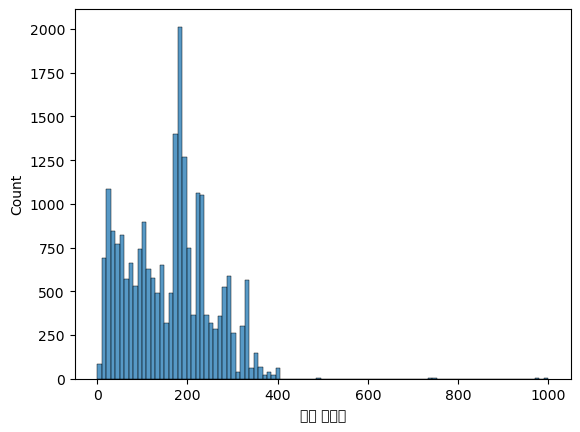

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(dfs['선박 총길이'])

<Axes: xlabel='선박제원(총길이, m)', ylabel='Count'>

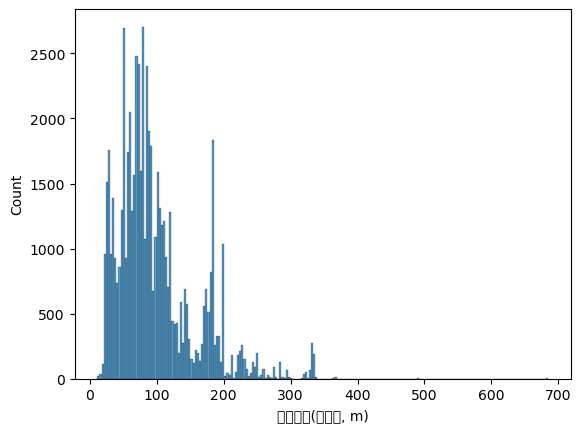

In [72]:
sns.histplot(merged_2['선박제원(총길이, m)'])

In [73]:
dfs['선박 너비'].describe()

count    22794.000000
mean        27.186907
std         38.669711
min          0.000000
25%         15.000000
50%         28.000000
75%         32.300000
max       4802.000000
Name: 선박 너비, dtype: float64

In [74]:
dfp['선박제원(총길이, m)'].describe()

count    6543.000000
mean      164.749719
std        70.838181
min        11.160000
25%       114.990000
50%       176.100000
75%       199.000000
max       685.000000
Name: 선박제원(총길이, m), dtype: float64

In [75]:
selected_columns = ['호출부호', '선박 총길이', '선박 너비']
selected_dfs = dfs[selected_columns]

In [76]:
merged_data = pd.merge(temp, selected_dfs, on='호출부호', how='left')

In [77]:
merged_data['선박제원(총길이, m)'] = merged_data['선박제원(총길이, m)'].fillna(merged_data['선박 총길이'])
merged_data['선박제원(너비, m)'] = merged_data['선박제원(너비, m)'].fillna(merged_data['선박 너비'])

In [78]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72139 entries, 0 to 72138
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호출부호                72139 non-null  object 
 1   입항일시                72139 non-null  object 
 2   출항일시                72139 non-null  object 
 3   접안_대기시간_분           72139 non-null  int64  
 4   출항_대기시간_분           72139 non-null  float64
 5   Service_Time_Start  72139 non-null  object 
 6   Service_Time_End    72139 non-null  object 
 7   계선장소_코드             72139 non-null  object 
 8   계선장소_숫자             72139 non-null  int64  
 9   계선장소명               72139 non-null  object 
 10  선박용도                72139 non-null  object 
 11  Service_Time_분      72139 non-null  float64
 12  대기율                 72114 non-null  float64
 13  총톤수                 61615 non-null  object 
 14  재화중량톤수              59935 non-null  object 
 15  선박제원(총길이, m)        71527 non-null  float64
 16  선박제원

In [79]:
merged_data.drop(columns = ['선박 총길이','선박 너비'], inplace = True)

#### 입항일시
- 입항일시를 ETA로 파악

In [80]:
df = merged_data.copy()

In [81]:
df['입항일시'] = pd.to_datetime(df['입항일시'])
df['ETA_Year'] = df['입항일시'].dt.year
df['ETA_Month'] = df['입항일시'].dt.month
df['ETA_Day'] = df['입항일시'].dt.day
df['ETA_Hour'] = df['입항일시'].dt.hour
df['ETA_Minute'] = df['입항일시'].dt.minute

In [82]:
df.columns

Index(['호출부호', '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', '선박국적(code)', '선박국적(이름)', 'ETA_Year',
       'ETA_Month', 'ETA_Day', 'ETA_Hour', 'ETA_Minute'],
      dtype='object')

### 2. 해양기상데이터 merge

In [83]:
wt20 = pd.read_csv(directory + '2020(울산해양기상).csv')
wt21= pd.read_csv(directory + '2021(울산해양기상).csv')
wt22 = pd.read_csv(directory + '2022(울산해양기상).csv')

In [84]:
wt = pd.concat([wt20, wt21, wt22], ignore_index=True)

In [85]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25329 entries, 0 to 25328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           25329 non-null  int64  
 1   일시           25329 non-null  object 
 2   풍속(m/s)      23830 non-null  float64
 3   풍향(deg)      23541 non-null  float64
 4   GUST풍속(m/s)  23890 non-null  float64
 5   현지기압(hPa)    25245 non-null  float64
 6   습도(%)        24733 non-null  float64
 7   기온(°C)       25265 non-null  float64
 8   수온(°C)       24788 non-null  float64
 9   최대파고(m)      25277 non-null  float64
 10  유의파고(m)      25269 non-null  float64
 11  평균파고(m)      25241 non-null  float64
 12  파주기(sec)     25281 non-null  float64
 13  파향(deg)      25284 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 2.7+ MB


In [86]:
wt.drop(columns = '지점', inplace = True)

In [87]:
wt

,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,2020-01-01 0:00,7.6,317.0,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0
1,2020-01-01 1:00,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
2,2020-01-01 2:00,10.8,312.0,14.6,1028.9,45.0,4.5,17.5,5.2,2.5,1.8,10.7,63.0
3,2020-01-01 3:00,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
4,2020-01-01 4:00,11.4,317.0,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25324,2022-12-31 19:00,5.5,316.0,7.6,1027.6,52.0,8.7,16.6,2.1,1.1,0.8,5.3,33.0
25325,2022-12-31 20:00,8.1,312.0,10.2,1027.6,56.0,8.5,16.7,2.2,1.3,0.9,5.3,30.0
25326,2022-12-31 21:00,8.9,309.0,11.7,1027.9,55.0,8.2,16.9,2.2,1.4,1.0,5.3,27.0
25327,2022-12-31 22:00,6.5,295.0,9.5,1027.9,55.0,7.9,16.9,1.6,1.1,0.8,4.9,30.0


#### 입항일시가 범위 밖인 행 제거

In [88]:
df = df[df['ETA_Year'].isin([2020, 2021, 2022])] 

In [89]:
df

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름),ETA_Year,ETA_Month,ETA_Day,ETA_Hour,ETA_Minute
0,000308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,...,NaN,NaN,NaN,NaN,NaN,2020,1,5,11,30
1,000308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,...,NaN,NaN,NaN,NaN,NaN,2020,2,27,8,50
2,000308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,...,NaN,NaN,NaN,NaN,NaN,2020,3,9,12,35
3,000308,2020-03-23 17:10:00,2020-03-24 15:35,0,0.0,2020-03-23 17:10:00,2020-03-24 15:35:00,MB2,1,2부두 01,...,NaN,NaN,NaN,NaN,NaN,2020,3,23,17,10
4,000552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,...,3.5,3.5,28.50,KR,대한민국,2021,7,3,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72134,ZGHZ3,2021-04-08 09:18:00,2021-04-09 10:00,0,0.0,2021-04-08 09:18:00,2021-04-09 10:00:00,WAB,4,(구)벙커링전용정박지 E3,...,15.0,21.5,242.40,KY,제도,2021,4,8,9,18
72135,ZGHZ4,2021-02-18 10:36:00,2021-03-10 02:20,9918,0.0,2021-02-25 07:54:00,2021-03-10 02:20:00,MDU,7,SK7부두,...,15.0,21.5,242.44,KY,제도,2021,2,18,10,36
72136,ZGIH9,2020-06-13 22:00:00,2020-06-16 01:00,0,372.0,2020-06-13 22:00:00,2020-06-15 18:48:00,WAE,2,정박지-E2,...,11.0,16.0,174.38,GB,영국,2020,6,13,22,0
72137,ZIRQ6,2020-12-10 03:00:00,2020-12-17 21:24,1789,1674.0,2020-12-11 08:49:00,2020-12-16 17:30:00,WAE,1,정박지-E1,...,7.7,8.9,111.50,IM,맨섬,2020,12,10,3,0


In [90]:
wt['일시'] = pd.to_datetime(wt['일시'])
wt['Wt_Year'] = wt['일시'].dt.year
wt['Wt_Month'] = wt['일시'].dt.month
wt['Wt_Day'] = wt['일시'].dt.day
wt['Wt_Hour'] = wt['일시'].dt.hour

In [91]:
wt.head()

,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),Wt_Year,Wt_Month,Wt_Day,Wt_Hour
0,2020-01-01 00:00:00,7.6,317.0,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0,2020,1,1,0
1,2020-01-01 01:00:00,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,2020,1,1,1
2,2020-01-01 02:00:00,10.8,312.0,14.6,1028.9,45.0,4.5,17.5,5.2,2.5,1.8,10.7,63.0,2020,1,1,2
3,2020-01-01 03:00:00,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0,2020,1,1,3
4,2020-01-01 04:00:00,11.4,317.0,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0,2020,1,1,4


In [92]:
merged = pd.merge(df, wt, 
                  left_on = ['ETA_Year','ETA_Month', 'ETA_Day', 'ETA_Hour'],
                  right_on = ['Wt_Year','Wt_Month', 'Wt_Day', 'Wt_Hour'],
                  how = 'left')

In [93]:
merged.head()

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),Wt_Year,Wt_Month,Wt_Day,Wt_Hour
0,000308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,...,17.2,2.3,1.3,0.9,7.1,55.0,2020.0,1.0,5.0,11.0
1,000308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,...,15.0,3.0,2.2,1.5,5.8,48.0,2020.0,2.0,27.0,8.0
2,000308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,...,15.0,0.7,0.5,0.4,5.3,49.0,2020.0,3.0,9.0,12.0
3,000308,2020-03-23 17:10:00,2020-03-24 15:35,0,0.0,2020-03-23 17:10:00,2020-03-24 15:35:00,MB2,1,2부두 01,...,15.5,1.3,0.9,0.6,3.0,224.0,2020.0,3.0,23.0,17.0
4,000552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
merged.drop(columns = ['Wt_Year','Wt_Month', 'Wt_Day', 'Wt_Hour'], inplace = True)

In [95]:
merged.to_csv(directory + '울산_전처리_ver6.csv',encoding = 'utf-8-sig', index = False)

In [96]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72139 entries, 0 to 72138
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   호출부호                72139 non-null  object        
 1   입항일시                72139 non-null  datetime64[ns]
 2   출항일시                72139 non-null  object        
 3   접안_대기시간_분           72139 non-null  int64         
 4   출항_대기시간_분           72139 non-null  float64       
 5   Service_Time_Start  72139 non-null  object        
 6   Service_Time_End    72139 non-null  object        
 7   계선장소_코드             72139 non-null  object        
 8   계선장소_숫자             72139 non-null  int64         
 9   계선장소명               72139 non-null  object        
 10  선박용도                72139 non-null  object        
 11  Service_Time_분      72139 non-null  float64       
 12  대기율                 72114 non-null  float64       
 13  총톤수                 61615 non-null  object    